# Titanic

<img src="input/Titanic.png" width="500"/>

<br>

Schritte:
* Datenset laden
* Erkunden
* Vorverarbeitung
* Visualisieren
* Trainieren
* Evaluierung

## 1. Datenset laden

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [2]:
titanic_data_raw = pd.read_csv('input/train.csv')

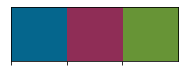

In [3]:
sns.set_palette(sns.color_palette(["#05668d", "#8f2d56", "#679436" ]))
sns.palplot(sns.color_palette(["#05668d", "#8f2d56", "#679436" ]))

## 2. Erkunden

![](input/Titanic_Explained.png)
Port of Embarkation = Abfahrtshafen

Fare = in Pounds

In [4]:
titanic_data_raw.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C


In [5]:
titanic_data_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_data_raw['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [7]:
titanic_data_raw['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [8]:
titanic_data_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_data_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Idee: 

Embarked - Zeilen Drop

Cabin - spalte drop, weil nur 1 Klassen eine Kabine haben und diese nur Id enthält, zusätzliche Spalte Cabin Booked

Age - Interpalation

Passanger Id - Spalte Drop weil es nicht relevant ist

Name - Spalte Drop weil komplett unterschiedlich, nicht relevant wie viele Tims gestorben sind

Ticket - Spalte Drop

## 3. Vorvearbeitung

### 3.1 Löschen von Null Werten

In [10]:
titanic_data_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic_data_raw.drop('PassengerId', axis=1, inplace=True)

In [12]:
titanic_data_raw.drop('Name', axis=1, inplace=True)

In [13]:
titanic_data_raw.drop('Ticket', axis=1, inplace=True)

In [14]:
titanic_data_raw.dropna(axis=0, inplace=True, subset=['Embarked'])

### 3.2 Kabinen Spalte Bearbeiten
In einem bool/int umwandeln

1 = gebucht

0 = nicht gebucht

In [15]:
titanic_data_raw["CabinBooked"] = titanic_data_raw["Cabin"].notnull().astype('int')

In [16]:
titanic_data_raw.drop('Cabin', axis=1, inplace=True)

### 3.3 Männlich Weiblich mit Ordinal Encoding

0 = Frau

1 = Mann

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
ordinal_encoder = OrdinalEncoder()
titanic_data_raw[['Sex']] = ordinal_encoder.fit_transform(titanic_data_raw[['Sex']])

In [19]:
titanic_data_raw.sample(10, random_state=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBooked
387,1,2,0.0,36.0,0,0,13.0000,S,0
259,1,2,0.0,50.0,0,1,26.0000,S,0
771,0,3,1.0,48.0,0,0,7.8542,S,0
208,1,3,0.0,16.0,0,0,7.7500,Q,0
683,0,3,1.0,14.0,5,2,46.9000,S,0
3,1,1,0.0,35.0,1,0,53.1000,S,1
677,1,3,0.0,18.0,0,0,9.8417,S,0
542,0,3,0.0,11.0,4,2,31.2750,S,0
532,0,3,1.0,17.0,1,1,7.2292,C,0
2,1,3,0.0,26.0,0,0,7.9250,S,0


### 3.5 Hafen Nominal Encoding (One Hot Encoding)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
one_hot_encoder = OneHotEncoder(sparse=False)

one_hot_raw = pd.DataFrame(one_hot_encoder.fit_transform(titanic_data_raw[['Embarked']]), columns=one_hot_encoder.get_feature_names_out())

one_hot_raw.index = titanic_data_raw.index
titanic_data_raw = pd.concat([titanic_data_raw, one_hot_raw], axis=1)
titanic_data_raw.drop(['Embarked'], axis=1, inplace=True)

In [22]:
titanic_data_raw.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBooked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1.0,22.0,1,0,7.2500,0,0.0,0.0,1.0
1,1,1,0.0,38.0,1,0,71.2833,1,1.0,0.0,0.0
2,1,3,0.0,26.0,0,0,7.9250,0,0.0,0.0,1.0
3,1,1,0.0,35.0,1,0,53.1000,1,0.0,0.0,1.0
4,0,3,1.0,35.0,0,0,8.0500,0,0.0,0.0,1.0
5,0,3,1.0,NaN,0,0,8.4583,0,0.0,1.0,0.0
6,0,1,1.0,54.0,0,0,51.8625,1,0.0,0.0,1.0
7,0,3,1.0,2.0,3,1,21.0750,0,0.0,0.0,1.0
8,1,3,0.0,27.0,0,2,11.1333,0,0.0,0.0,1.0
9,1,2,0.0,14.0,1,0,30.0708,0,1.0,0.0,0.0


### 3.6 Alter Imputieren

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
simple_imputer = SimpleImputer(strategy='mean')

titanic_data_raw[['Age']] = simple_imputer.fit_transform(titanic_data_raw[['Age']])

In [25]:
titanic_data_raw.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
CabinBooked    0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

### 3.7 Train Test Validation Split 

In [26]:
my_test_and_val_size = 0.3
my_random_state = 10

X = titanic_data_raw[titanic_data_raw.columns[1:]]
y = titanic_data_raw['Survived']

X_train, X_test_full, y_train, y_test_full = train_test_split(X, y,random_state=my_random_state, test_size=my_test_and_val_size, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, random_state=my_random_state, test_size=0.5,  stratify=y_test_full)

array([<AxesSubplot:ylabel='0'>], dtype=object)

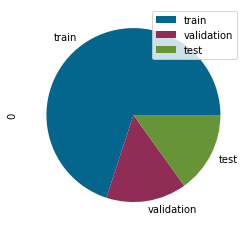

In [27]:
pd.DataFrame([len(y_train), len(y_val), len(y_test)], index=['train','validation', 'test']).plot(kind='pie', subplots=True)

<AxesSubplot:title={'center':'test'}, ylabel='Survived'>

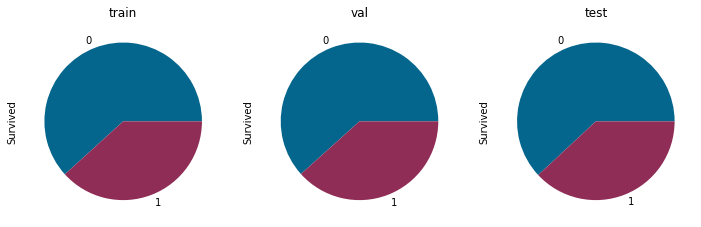

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')

## 4. Visualisieren
### 4.1 Überlebende

In [29]:
titanic_data_raw['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

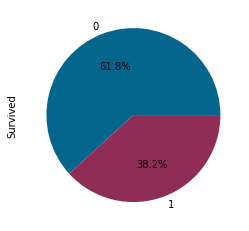

In [30]:
titanic_data_raw['Survived'].value_counts().plot(kind='pie',  autopct="%1.1f%%")

### 4.2 "Frauen und Kinder zuerst"
1.0 = Männlich

0.0 = Weiblich

In [31]:
titanic_data_raw['Sex'].value_counts()

1.0    577
0.0    312
Name: Sex, dtype: int64

In [32]:
survived_map = {0:'Dead', 1:'Survived'}
sex_map = {0:'Female', 1:'Male'}


titanic_copy=titanic_data_raw.copy()
titanic_copy['Survived'] = titanic_copy['Survived'].map(survived_map).astype(str)
titanic_copy['Sex'] = titanic_copy['Sex'].map(sex_map).astype(str)


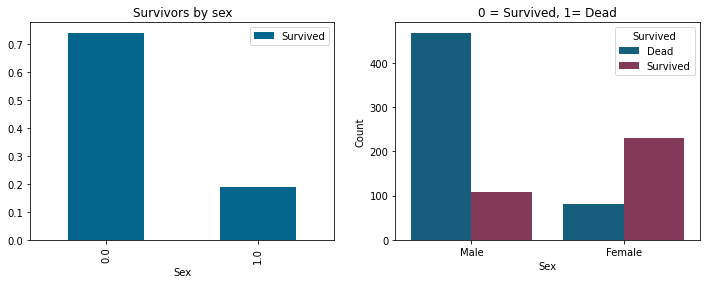

In [33]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

titanic_data_raw[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')

sns.countplot(x='Sex', hue='Survived', data=titanic_copy, ax=ax[1])

ax[1].set_ylabel('Count')
ax[1].set_title('0 = Survived, 1= Dead')

plt.show()

### 4.3 Korrelation

In [34]:
import seaborn as sns

<AxesSubplot:>

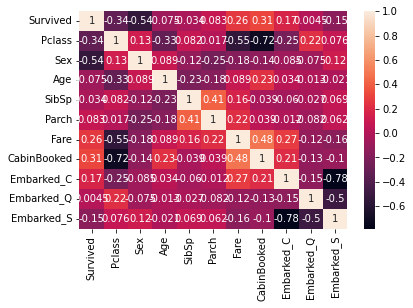

In [35]:
sns.heatmap(titanic_data_raw.corr(), annot=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

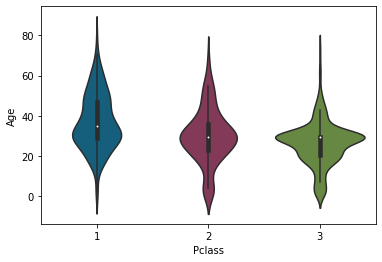

In [36]:
sns.violinplot(data=titanic_data_raw, x="Pclass", y="Age", size=4)

In [37]:
titanic_data_raw['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

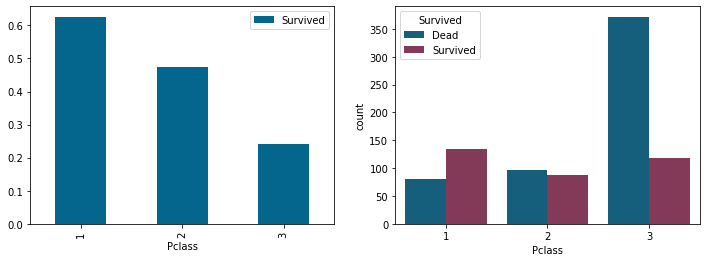

In [38]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
titanic_data_raw[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
sns.countplot(x='Pclass', hue='Survived', data=titanic_copy, ax=ax[1])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Survived'>

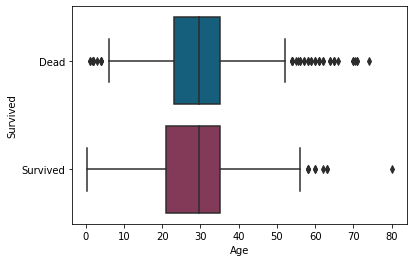

In [39]:
survived_map = {0:'Dead', 1:'Survived'}

titanic_copy=titanic_data_raw.copy()
titanic_copy['Survived'] = titanic_copy['Survived'].map(survived_map).astype(str)

sns.boxplot(data=titanic_copy, x="Age", y="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

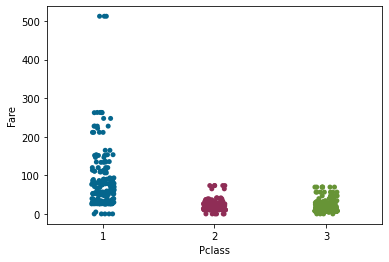

In [40]:
sns.stripplot(data=titanic_data_raw, x="Pclass", y="Fare")

## 5. Trainieren

In [41]:
y_train.value_counts()

0    384
1    238
Name: Survived, dtype: int64

In [42]:
y_test.value_counts()

0    83
1    51
Name: Survived, dtype: int64

In [43]:
y_val.value_counts()

0    82
1    51
Name: Survived, dtype: int64

### 5.1 Baseline

In [44]:
from sklearn.dummy import DummyClassifier

In [45]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 61.94%


### 5.2 Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [47]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1
    for curr_max_depth in range(1, 10):
        dt_model = DecisionTreeClassifier(max_depth=curr_max_depth, random_state=my_random_state)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)
        
        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = curr_max_depth
        if do_print:
            print('max depth {}: {:.2%} accuracy on validation set.'.format(curr_max_depth, accuracy_score))
        if do_print:
            print('-' * 20)
            print('best max depth {} has {:.2%} accuracy.'.format(result,accuracy_max))
    return result

In [48]:
best_max_depth = train_and_find_best_depth(X_train,X_val, y_train, y_val, True)

max depth 1: 77.44% accuracy on validation set.
--------------------
best max depth 1 has 77.44% accuracy.
max depth 2: 75.19% accuracy on validation set.
--------------------
best max depth 1 has 77.44% accuracy.
max depth 3: 79.70% accuracy on validation set.
--------------------
best max depth 3 has 79.70% accuracy.
max depth 4: 80.45% accuracy on validation set.
--------------------
best max depth 4 has 80.45% accuracy.
max depth 5: 79.70% accuracy on validation set.
--------------------
best max depth 4 has 80.45% accuracy.
max depth 6: 80.45% accuracy on validation set.
--------------------
best max depth 6 has 80.45% accuracy.
max depth 7: 77.44% accuracy on validation set.
--------------------
best max depth 6 has 80.45% accuracy.
max depth 8: 77.44% accuracy on validation set.
--------------------
best max depth 6 has 80.45% accuracy.
max depth 9: 78.95% accuracy on validation set.
--------------------
best max depth 6 has 80.45% accuracy.


In [49]:
dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_val)

accuracy_score = metrics.accuracy_score(y_val, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 80.45%
Precision: 74.51%
Recall: 74.51%
F1: 74.51%


In [50]:
from sklearn import tree

text_representation = tree.export_text(dt_model, feature_names=list(titanic_data_raw.columns[1:]))
print(text_representation)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- CabinBooked <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- CabinBooked >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Fare <= 13.43
|   |   |   |   |--- Age <= 26.00
|   |   |   |   |   |--- Fare <= 12.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Fare >  12.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  26.00
|   |   |   |   |   |--- Age <= 37.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  37.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Fare >  13.43
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- Age <= 25.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  25.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 22.90
|   |   |   |--- Age <= 16.50
|   

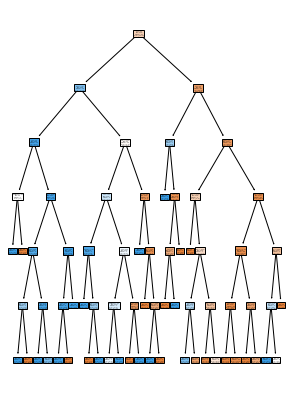

In [51]:
from sklearn import tree

survived_map = {0:'Dead', 1:'Survived'}
titanic_data_raw['Survived'].map(survived_map).astype(str).unique()

fig = plt.figure(figsize=(5,7))
tree.plot_tree(dt_model, feature_names=titanic_data_raw.columns[1:], class_names=titanic_data_raw['Survived'].map(survived_map).astype(str).unique(),  filled=True);

### 5.3 Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [53]:
rf_model = RandomForestClassifier(random_state=my_random_state, n_estimators=300)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=10)

In [54]:
y_pred = rf_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 80.45%
Precision: 73.58%
Recall: 76.47%
F1: 75.00%


### 5.4 Undersampling

In [55]:
from imblearn.under_sampling import RandomUnderSampler

In [56]:
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=my_random_state)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

In [57]:
y_under.value_counts()

0    238
1    238
Name: Survived, dtype: int64

In [58]:
rf_model = RandomForestClassifier(random_state=my_random_state, n_estimators=300)
rf_model.fit(X_under, y_under)

y_pred = rf_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 72.18%
Precision: 60.00%
Recall: 82.35%
F1: 69.42%


### 5.5 Oversampling

In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
oversampler = RandomOverSampler(sampling_strategy=1, random_state=my_random_state)
X_over, y_over = oversampler.fit_resample(X_train, y_train)

In [61]:
y_over.value_counts()

0    384
1    384
Name: Survived, dtype: int64

In [62]:
rf_model = RandomForestClassifier(random_state=my_random_state, n_estimators=300)
rf_model.fit(X_over, y_over)

y_pred = rf_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 76.69%
Precision: 66.67%
Recall: 78.43%
F1: 72.07%


### 5.6 SMOTE

In [63]:
from imblearn.over_sampling import SMOTENC

In [64]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBooked,Embarked_C,Embarked_Q,Embarked_S
159,3,1.0,29.642093,8,2,69.5500,0,0.0,0.0,1.0
700,1,0.0,18.000000,1,0,227.5250,1,1.0,0.0,0.0
740,1,1.0,29.642093,0,0,30.0000,1,0.0,0.0,1.0
544,1,1.0,50.000000,1,0,106.4250,1,1.0,0.0,0.0
192,3,0.0,19.000000,1,0,7.8542,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
799,3,0.0,30.000000,1,1,24.1500,0,0.0,0.0,1.0
228,2,1.0,18.000000,0,0,13.0000,0,0.0,0.0,1.0
566,3,1.0,19.000000,0,0,7.8958,0,0.0,0.0,1.0
714,2,1.0,52.000000,0,0,13.0000,0,0.0,0.0,1.0


In [65]:
smote = SMOTENC(random_state=my_random_state, sampling_strategy=0.7, categorical_features=[1,6,7,8,9])
X_smote, y_smote = smote.fit_resample(X_train, y_train)

y_smote.value_counts()

0    384
1    268
Name: Survived, dtype: int64

In [66]:
undersampler = RandomUnderSampler(random_state=my_random_state, sampling_strategy=1)
X_smote, y_smote = undersampler.fit_resample(X_smote, y_smote)

y_smote.value_counts()

0    268
1    268
Name: Survived, dtype: int64

In [67]:
rf_model = RandomForestClassifier(random_state=my_random_state, n_estimators=300)
rf_model.fit(X_smote, y_smote)

y_pred = rf_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 73.68%
Precision: 62.12%
Recall: 80.39%
F1: 70.09%


### 5.7 Results

In [68]:
rf_model_best = RandomForestClassifier(random_state=my_random_state, n_estimators=300)
rf_model_best.fit(X_train, y_train)
y_pred = rf_model_best.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 80.45%
Precision: 73.58%
Recall: 76.47%
F1: 75.00%


In [69]:
rf_model = RandomForestClassifier(random_state=my_random_state, n_estimators=300)
rf_model.fit(X_under, y_under)

y_pred = rf_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 72.18%
Precision: 60.00%
Recall: 82.35%
F1: 69.42%


In [70]:
rf_model = RandomForestClassifier(random_state=my_random_state, n_estimators=300)
rf_model.fit(X_over, y_over)

y_pred = rf_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 76.69%
Precision: 66.67%
Recall: 78.43%
F1: 72.07%


In [71]:
rf_model = RandomForestClassifier(random_state=my_random_state, n_estimators=300)
rf_model.fit(X_smote, y_smote)

y_pred = rf_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 73.68%
Precision: 62.12%
Recall: 80.39%
F1: 70.09%


### 5.8 Feature Importance

In [72]:
rf_model_best.feature_importances_

array([0.08380451, 0.26610399, 0.24797855, 0.04658055, 0.03998947,
       0.23743397, 0.04272642, 0.0148332 , 0.00717394, 0.01337541])

In [73]:
feature_importances = pd.Series(rf_model_best.feature_importances_, index=titanic_data_raw.columns[1:])
feature_importances.sort_values(ascending=False)

Sex            0.266104
Age            0.247979
Fare           0.237434
Pclass         0.083805
SibSp          0.046581
CabinBooked    0.042726
Parch          0.039989
Embarked_C     0.014833
Embarked_S     0.013375
Embarked_Q     0.007174
dtype: float64

<AxesSubplot:>

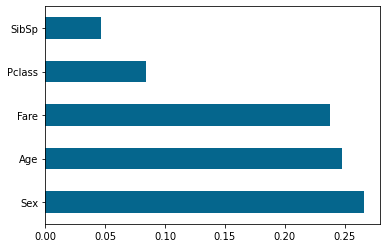

In [74]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances.nlargest(5).plot(kind='barh')

## 6. Vorhersagen

<img src="input/Titanic_rose.png" width="300" align="left"/>

In [75]:
# initialize list elements
data = [[1,0,17,1,1,150,1, 0,0,1] #Rose
        ,[3,1,20,0,0,25,0, 0,0,1]] #Jack
  
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'CabinBooked', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])

y_pred = rf_model.predict(df)
y_pred

array([1, 0])

In [76]:
# initialize list elements
data = [[2,0,19,0,0, 80,0, 1,0,0] #Anna
        ,[1,0,19,0,0,100, 1, 1,0,0]]   #Sheila
  
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'CabinBooked', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])
  
y_pred = rf_model.predict(df)
y_pred

array([1, 1])